In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/123/SRMAP/Semester 6/Machine Learning Lab/Lab_Task-6/Diabetes Binary Classification.csv")

In [3]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Class variable (0 or 1)'].value_counts()

Class variable (0 or 1)
0    500
1    268
Name: count, dtype: int64

In [5]:
df_0 = df[df['Class variable (0 or 1)']==0]
df_0.shape

(500, 9)

In [6]:
df_1 = df[df['Class variable (0 or 1)']==1]
df_1.shape

(268, 9)

In [7]:
df_0_downsampled = df_0.sample(df_1.shape[0])
df_0_downsampled.shape

(268, 9)

In [8]:
df_balanced = pd.concat([df_0_downsampled, df_1])
df_balanced.shape

(536, 9)

In [9]:
df_balanced['Class variable (0 or 1)'].value_counts()

Class variable (0 or 1)
0    268
1    268
Name: count, dtype: int64

In [10]:
df_balanced_features = df_balanced.iloc[:, :-1]  # Features

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced_features,df_balanced['Class variable (0 or 1)'], test_size=0.3, stratify=df_balanced['Class variable (0 or 1)'])

In [12]:
X_train.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
360,5,189,64,33,325,31.2,0.583,29
170,6,102,82,0,0,30.8,0.180,36
429,1,95,82,25,180,35.0,0.233,43
197,3,107,62,13,48,22.9,0.678,23
667,10,111,70,27,0,27.5,0.141,40


In [13]:
X_test.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
218,5,85,74,22,0,29.0,1.224,32
60,2,84,0,0,0,0.0,0.304,21
207,5,162,104,0,0,37.7,0.151,52
174,2,75,64,24,55,29.7,0.370,33
96,2,92,62,28,0,31.6,0.130,24


In [14]:
X_train.count()

Number of times pregnant                                                    375
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    375
Diastolic blood pressure (mm Hg)                                            375
Triceps skin fold thickness (mm)                                            375
2-Hour serum insulin (mu U/ml)                                              375
Body mass index (weight in kg/(height in m)^2)                              375
Diabetes pedigree function                                                  375
Age (years)                                                                 375
dtype: int64

In [15]:
X_test.count()

Number of times pregnant                                                    161
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    161
Diastolic blood pressure (mm Hg)                                            161
Triceps skin fold thickness (mm)                                            161
2-Hour serum insulin (mu U/ml)                                              161
Body mass index (weight in kg/(height in m)^2)                              161
Diabetes pedigree function                                                  161
Age (years)                                                                 161
dtype: int64

In [16]:
import math
def Eucliden_distance(x, y):
    d1 = x['Number of times pregnant'] - y['Number of times pregnant'];
    d2 = x['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'] - y['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'];
    d3 = x['Diastolic blood pressure (mm Hg)'] - y['Diastolic blood pressure (mm Hg)'];
    d4 = x['Triceps skin fold thickness (mm)'] - y['Triceps skin fold thickness (mm)'];
    d5 = x['2-Hour serum insulin (mu U/ml)'] - y['2-Hour serum insulin (mu U/ml)'];
    d6 = x['Body mass index (weight in kg/(height in m)^2)'] - y['Body mass index (weight in kg/(height in m)^2)'];
    d7 = x['Diabetes pedigree function'] - y['Diabetes pedigree function'];
    d8 = x['Age (years)'] - y['Age (years)'];
    return math.sqrt(d1**2 + d2**2 + d3**2 + d4**2 + d5**2 + d6**2 + d7**2 + d8**2);

In [22]:
k = 15
y_predicted = [0]*161
for i in range(161):
    rank = [0]*375
    dis = [0]*375
    for j in range(375):
        dis[j] = Eucliden_distance(X_train.iloc[j], X_test.iloc[i])
        rank[j] = j
    for e in range(375):
        for j in range(375):
            if(dis[e]<dis[j]):
                temp = dis[j]
                dis[j] = dis[e]
                dis[e] = temp
                temp1 = rank[j]
                rank[j] = rank[e]
                rank[e] = temp1
    No_of_0 = 0
    No_of_1 = 0
    for h in range(k):
        if(y_train.iloc[rank[h]]==0):
            No_of_0+=1
        else:
            No_of_1+=1
    if(No_of_0>No_of_1):
        y_predicted[i] = 0
    else:
        y_predicted[i] = 1
y_predicted

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [23]:
y_test

218    1
60     0
207    1
174    0
96     0
      ..
86     0
443    1
560    1
515    1
41     0
Name: Class variable (0 or 1), Length: 161, dtype: int64

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm 

array([[55, 26],
       [15, 65]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

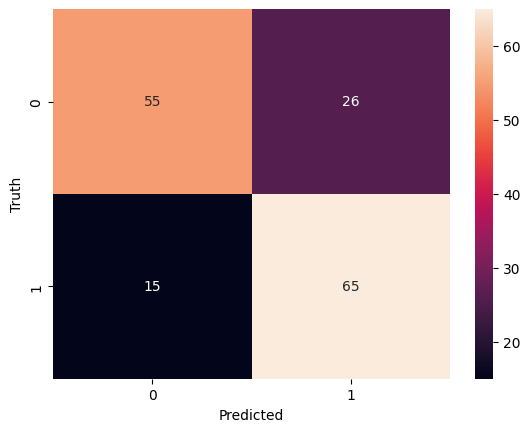

In [25]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        81
           1       0.71      0.81      0.76        80

    accuracy                           0.75       161
   macro avg       0.75      0.75      0.74       161
weighted avg       0.75      0.75      0.74       161

